In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os
os.chdir(r'/content')
!mkdir .kaggle

In [ ]:
##code related to kaggle

In [ ]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

In [ ]:
os.chdir(r'/content/{/content}/datasets/sanikamal/horses-or-humans-dataset')
!unzip *.zip

In [6]:
import numpy as np
Hpath = r'/content/{/content}/datasets/sanikamal/horses-or-humans-dataset/horse-or-human/train/horses'
fnamesH = np.array(os.listdir(Hpath))
fpathH = [os.path.join(Hpath, fnameH) for fnameH in fnamesH[range(8)]]
hpath = r'/content/{/content}/datasets/sanikamal/horses-or-humans-dataset/horse-or-human/train/humans'
fnamesh = np.array(os.listdir(hpath))
fpathh = [os.path.join(hpath, fnameh) for fnameh in fnamesh[range(8)]]

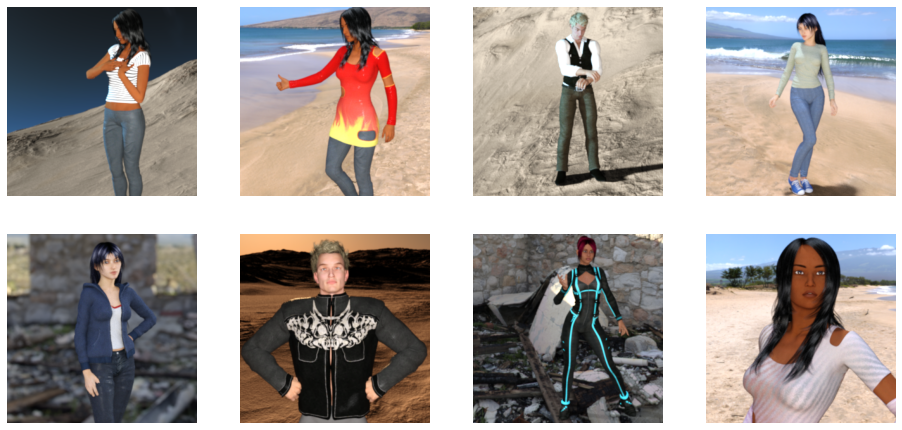

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i in range(8):
  sp = plt.subplot(4, 4, i + 1)#How many images do u want in a row (4, 4), what is the index (i + 1)
  sp.axis('off')
  img1 = mpimg.imread(fpathh[i])
  plt.imshow(img1)

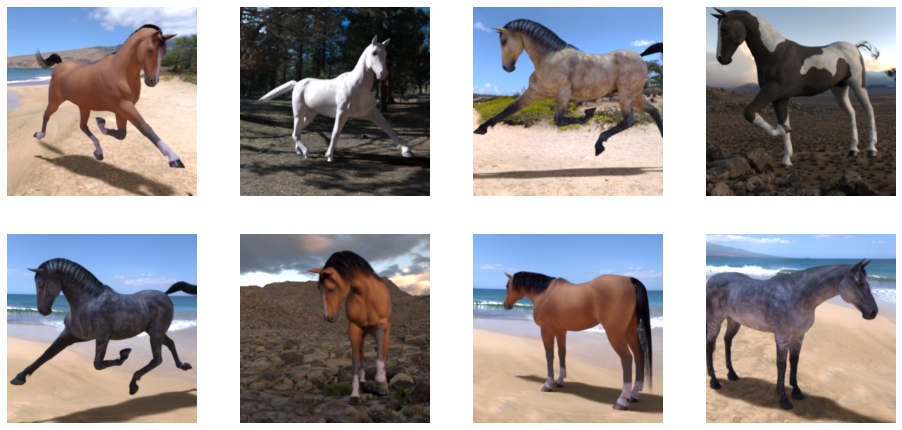

In [8]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i in range(8):
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('off')
  img1 = mpimg.imread(fpathH[i])
  plt.imshow(img1)

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1/255)
test_generator = ImageDataGenerator(rescale = 1/255)
x_train = train_generator.flow_from_directory(r'/content/{/content}/datasets/sanikamal/horses-or-humans-dataset/horse-or-human/train',
                                              target_size = (300, 300), color_mode = 'rgb', class_mode = 'binary' ,batch_size = 128)
x_test = test_generator.flow_from_directory(r'/content/{/content}/datasets/sanikamal/horses-or-humans-dataset/horse-or-human/validation',
                                            target_size = (300, 300), color_mode = 'rgb', class_mode = 'binary', batch_size = 32)#Keep the batchsize of valid less than that of train

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('accuracy') > 0.97:
      print('\nThe accuracy has reached 97%, stopping training')
      self.model.stop_training = True
callbacks = mycallback()

In [12]:
def model_func():
  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), input_shape = (300, 300, 3), activation = tf.nn.relu),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                      tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)])
  print(model.summary)
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
  history = model.fit(x_train, steps_per_epoch = 8, epochs = 15, verbose = 1, validation_data = x_test, validation_steps = 8, callbacks = [callbacks])
  return model, history.history['accuracy'][-1]

In [13]:
model, history = model_func()

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe94f618e10>>
Epoch 1/15
8/8 [==============================] - 7s 918ms/step - loss: 0.6032 - accuracy: 0.6263 - val_loss: 0.6196 - val_accuracy: 0.7539
Epoch 2/15
8/8 [==============================] - 7s 912ms/step - loss: 0.2389 - accuracy: 0.9055 - val_loss: 1.4297 - val_accuracy: 0.8203
Epoch 3/15
8/8 [==============================] - 7s 910ms/step - loss: 0.1244 - accuracy: 0.9588 - val_loss: 1.6186 - val_accuracy: 0.8555
Epoch 4/15
8/8 [==============================] - 7s 912ms/step - loss: 0.1597 - accuracy: 0.9310 - val_loss: 1.8725 - val_accuracy: 0.7852
Epoch 5/15
8/8 [==============================] - 7s 904ms/step - loss: 0.0914 - accuracy: 0.9655 - val_loss: 2.3449 - val_accuracy: 0.7578
Epoch 6/15
8/8 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9855
The accuracy has reached 97%, stopping training
8/8 [==============================] - 7s 903ms/

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


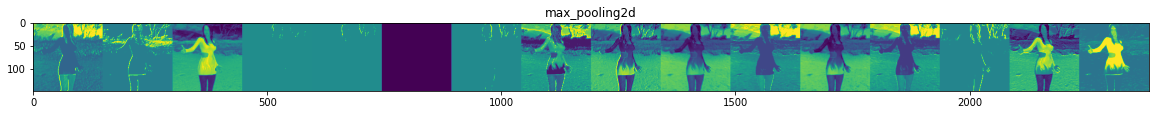

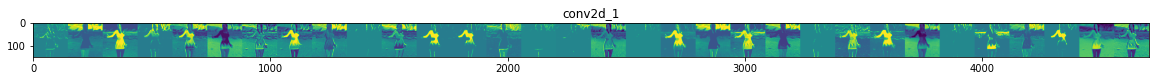

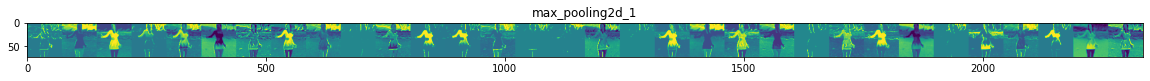

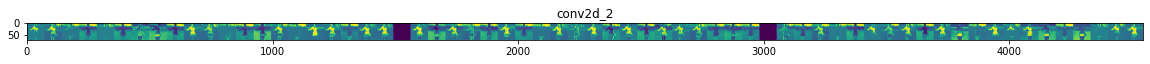

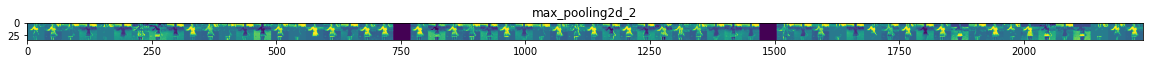

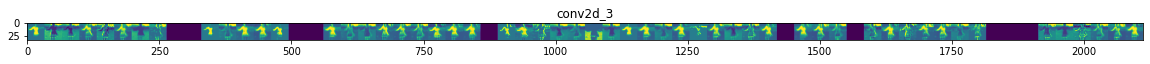

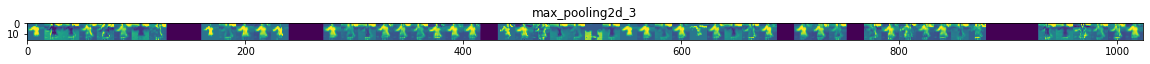

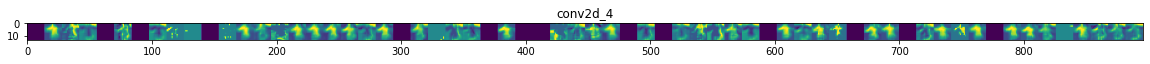

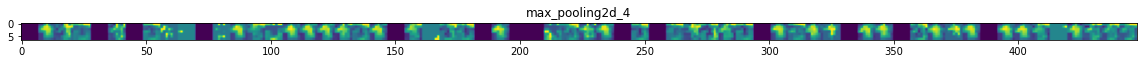

In [19]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in  model.layers[1:]]
visulization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
horse_files = [os.path.join(Hpath, fnameHs) for fnameHs in fnamesH[:]]
human_files = [os.path.join(hpath, fnamehs) for fnamehs in fnamesh[:]]
img_path = random.choice(horse_files + human_files)
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255
successive_feature_maps = visulization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
      scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')